In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.drop(['show_id'], axis= 1, inplace= True)

In [4]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6234 non-null   object
 1   title         6234 non-null   object
 2   director      4265 non-null   object
 3   cast          5664 non-null   object
 4   country       5758 non-null   object
 5   date_added    6223 non-null   object
 6   release_year  6234 non-null   int64 
 7   rating        6224 non-null   object
 8   duration      6234 non-null   object
 9   listed_in     6234 non-null   object
 10  description   6234 non-null   object
dtypes: int64(1), object(10)
memory usage: 535.9+ KB


In [7]:
df.shape

(6234, 11)

In [8]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##### INITIAL ANALYSIS
1. There are 624 observations.
2. There are missing data in cast, country, date_added and director columns.

### Handling Missing Data

In [9]:
df.dropna(inplace= True)

In [10]:
df.sort_values(by= 'date_added', inplace= True) # Sorted Values by Date

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 6213 to 0
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          3774 non-null   object
 1   title         3774 non-null   object
 2   director      3774 non-null   object
 3   cast          3774 non-null   object
 4   country       3774 non-null   object
 5   date_added    3774 non-null   object
 6   release_year  3774 non-null   int64 
 7   rating        3774 non-null   object
 8   duration      3774 non-null   object
 9   listed_in     3774 non-null   object
 10  description   3774 non-null   object
dtypes: int64(1), object(10)
memory usage: 353.8+ KB


### Univariable Analysis

In [12]:
plt.style.use('bmh')

In [13]:
categorical_col = ['type', 'listed_in', 'release_year', 'rating']
continuous_col = ['date_added', 'release_year']
others = ['cast']

##### Type

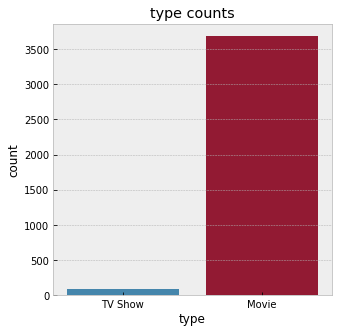

In [14]:
plt.figure(figsize= (5, 5))
plt.title('type counts')
sns.countplot(df['type'])

In [15]:
df['type'].value_counts()

Movie      3678
TV Show      96
Name: type, dtype: int64

There are more Movies as compared to TV Shows in the sample dataset.
1. 3678 Movies
2. 96 TV Shows

##### Ratings

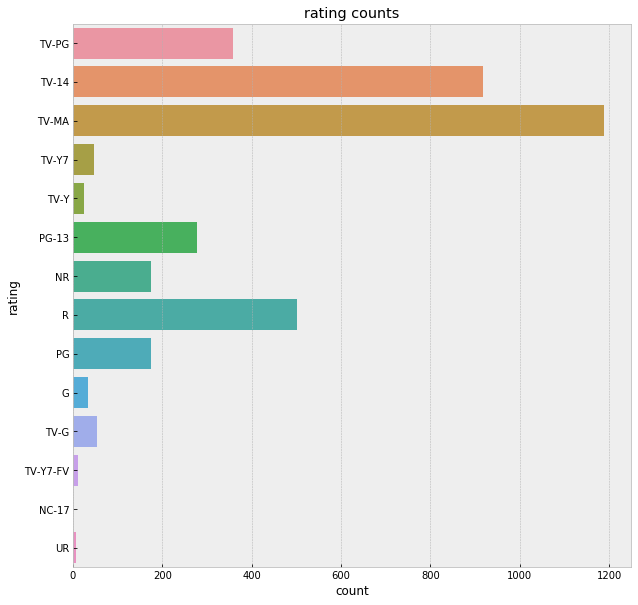

In [16]:
plt.figure(figsize= (10, 10))
plt.title('rating counts')
sns.countplot(y= 'rating', data= df)

In [17]:
print('Number of Unique Ratings:', len(df['rating'].unique()))

Number of Unique Ratings: 14


In [18]:
TV = [w for w in list(set(df['rating'])) if 'TV' in w]
TV

['TV-PG', 'TV-Y7-FV', 'TV-14', 'TV-Y', 'TV-G', 'TV-MA', 'TV-Y7']

Rating Details
1. TV-Y -> For all children.
2. TV-Y7 -> For children above 7.
3. TV-Y7 -> For children above 7, programme contains fantasy violence.
4. TV-G -> General audience.
5. TV-PG -> Parental guidance is advised.
6. TV-14 -> May not be suitable for children below 15.
7. TV-MA -> Mature audiences.

In [19]:
Movies = [w for w in list(set(df['rating'])) if not 'TV' in w]
Movies

['PG-13', 'NC-17', 'G', 'UR', 'R', 'PG', 'NR']

Rating Details

1. G -> General Audiences: All ages.

2. PG -> Parental Guidance Suggested: Some materials may not be suitable for children.

3. PG-13 -> Parents Strongly Cautioned: Some materials may be inappropriate for children under 13.

4. R -> Restricted: Under 17 requires accompanying parent or adult guardian.

5. NR -> Not Rated.

6. UR -> NOt Rated.

7. NC-17 -> No Children 17 and Under: Contains adult scenes that are inappropriate for children under 17.

Since UR and NR is the same, conbine these ratings.

In [20]:
def converter(s):
    if s == 'UR':
        return 'NR'
    else:
        return s
df['rating'] = df['rating'].apply(converter)

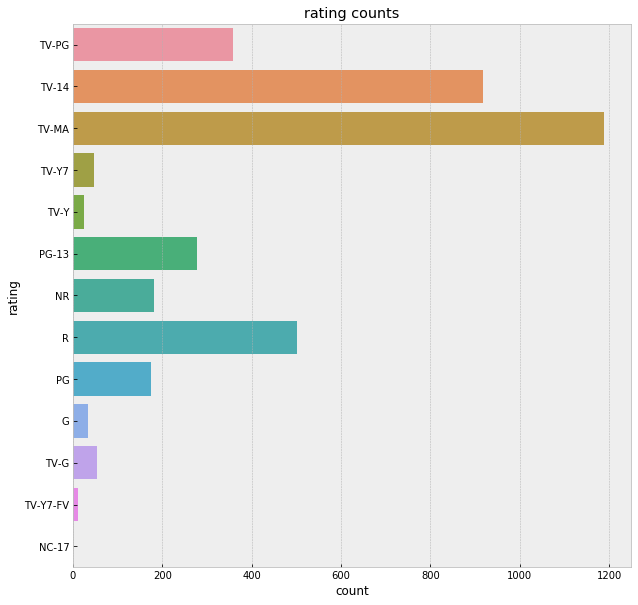

In [21]:
plt.figure(figsize= (10, 10))
plt.title('rating counts')
sns.countplot(y= 'rating', data= df)

In [22]:
print('Number of Unique Ratings:', len(df['rating'].unique()))

Number of Unique Ratings: 13


In [23]:
TV = [w for w in list(set(df['rating'])) if 'TV' in w]
TV

['TV-PG', 'TV-Y7-FV', 'TV-14', 'TV-Y', 'TV-G', 'TV-MA', 'TV-Y7']

In [24]:
Movies = [w for w in list(set(df['rating'])) if not 'TV' in w]
Movies

['PG-13', 'NC-17', 'G', 'R', 'PG', 'NR']

Ratings are interchangable, movies can have tv ratings and/or tv shows can have movie ratings. From the countplot, it seems that the movies and tv shows are mostly targetted towards more matured audiences, 14 and above. This could be because these age group have greater access to Netflix (ie: internet connection, laptop/phones etc, and credit cards)

##### Listed In 

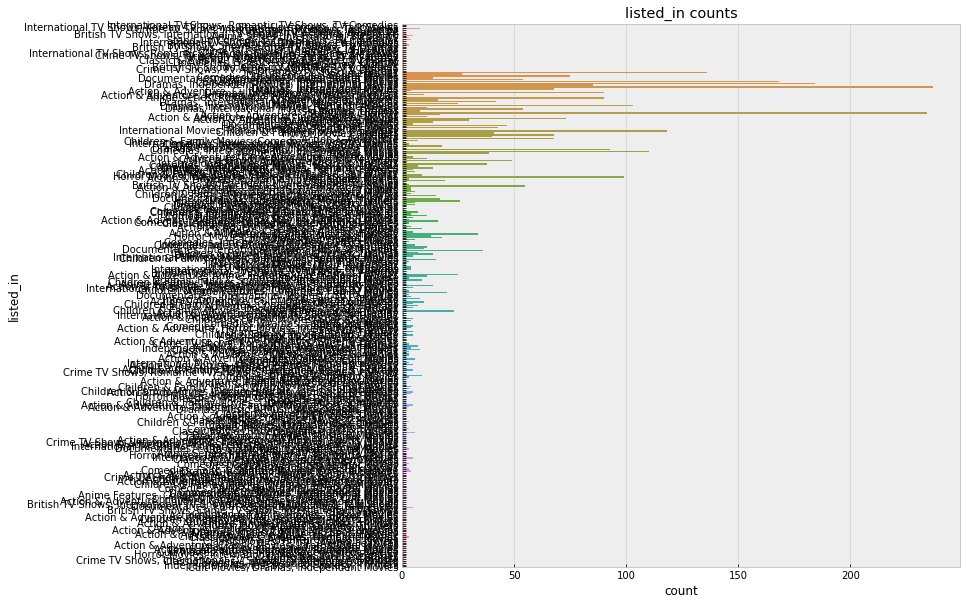

In [25]:
plt.figure(figsize= (10, 10))
plt.title('listed_in counts')
sns.countplot(y= 'listed_in', data= df)

WAYYYYYYYYYYYYY TOO MANY DIFFERENT COMBINATIONS OF CATEGORIES TO LIST A MOVIE IN!

In [26]:
# Word Cloud for listed_in
from wordcloud import WordCloud

words = ', '.join(list(df['listed_in']))
words = words.split(', ')
words = ' '.join(words)

wordcloud = WordCloud(width = 800, height = 300, 
                background_color ='white',  
                min_font_size = 5).generate(words) 

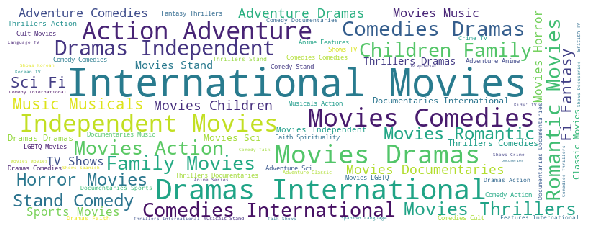

In [27]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [28]:
# Analysis on listed_in
listed_in = pd.Series(', '.join(list(df['listed_in'])).split(', '))

In [29]:
listed_in.value_counts()

International Movies            1722
Dramas                          1572
Comedies                        1058
Action & Adventure               583
Independent Movies               545
Thrillers                        382
Romantic Movies                  363
Children & Family Movies         322
Documentaries                    306
Horror Movies                    254
Stand-Up Comedy                  241
Music & Musicals                 193
Sci-Fi & Fantasy                 185
Sports Movies                    116
Classic Movies                    76
Cult Movies                       54
LGBTQ Movies                      51
International TV Shows            50
Anime Features                    43
Faith & Spirituality              41
TV Dramas                         32
Crime TV Shows                    23
Movies                            20
TV Comedies                       17
British TV Shows                  17
Romantic TV Shows                 12
TV Action & Adventure             11
K

In [30]:
print('Number of Unique Categories:', len(listed_in.unique()))

Number of Unique Categories: 42


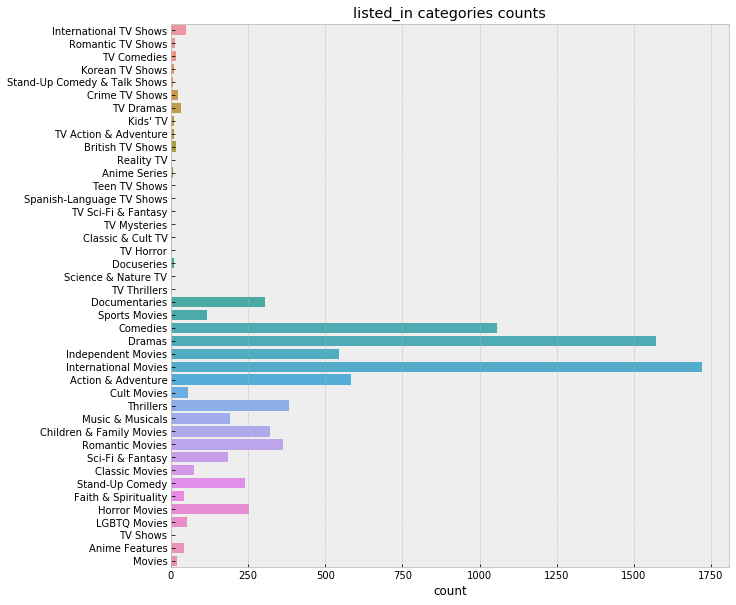

In [31]:
plt.figure(figsize= (10, 10))
plt.title('listed_in categories counts')
sns.countplot(y= listed_in)

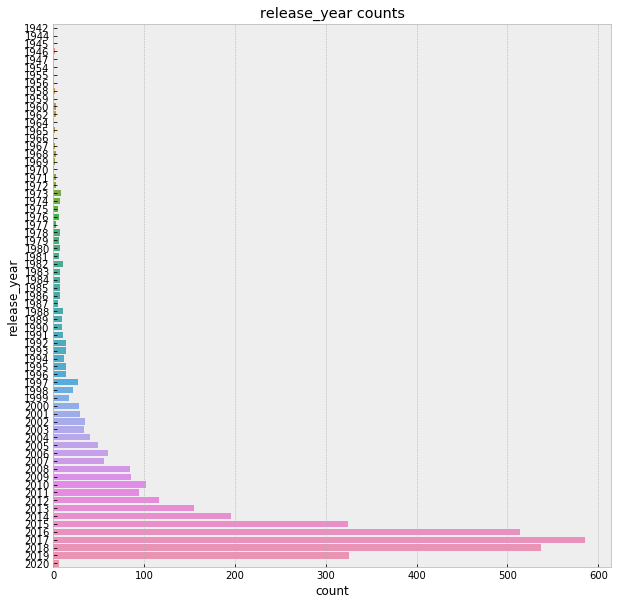

In [32]:
plt.figure(figsize= (10, 10))
plt.title('release_year counts')
sns.countplot(y= 'release_year', data= df)

The bulk of Movies/TV Shows released is between 2015 and 2019. This dataset was curated up till 2020, therefore to include conclude that Movies/TV Shows released in 2020 is very little is an absurd assumption. 

### Continous Data

In [33]:
print('Earliest Movie Released By Year:', df['release_year'].min())
print('Latest Movie Released By Year:', df['release_year'].max())

Earliest Movie Released By Year: 1942
Latest Movie Released By Year: 2020


print('Earliest Movie Added By Date:', df.loc[394]['date_added'])
print('Latest Movie Added By Date:', df.loc[5]['date_added'])

In [34]:
df['date_added'].value_counts()

January 1, 2020      105
November 1, 2019      73
March 1, 2018         70
December 31, 2019     64
October 1, 2018       61
                    ... 
October 25, 2017       1
October 27, 2017       1
May 27, 2016           1
June 17, 2017          1
February 26, 2016      1
Name: date_added, Length: 1014, dtype: int64

In [35]:
print('Most Number of Movies/TV Shows Released in a Day: 105')
print('1 January 2020')

Most Number of Movies/TV Shows Released in a Day: 105
1 January 2020


In [36]:
print('Least Number of Movies/TV Shows Released in a Day (Many Days): 1')

Least Number of Movies/TV Shows Released in a Day (Many Days): 1


In [37]:
list_of_dates_single_release = sorted(list(pd.DataFrame(df['date_added'].value_counts())[pd.DataFrame(df['date_added'].value_counts())['date_added'] == 1].index))

In [38]:
print('Number of Days with Single Release:', len(list_of_dates_single_release))

Number of Days with Single Release: 458


In [39]:
df['date_added'] = pd.DatetimeIndex(pd.to_datetime(df['date_added'])).year

In [40]:
years = df['date_added']
pd.DataFrame(years.value_counts()).rename({'date_added' : 'year_added'}, axis= 1)

,year_added
2019,1386
2018,1140
2017,805
2016,211
2020,140
2015,50
2014,14
2011,13
2013,7
2012,4


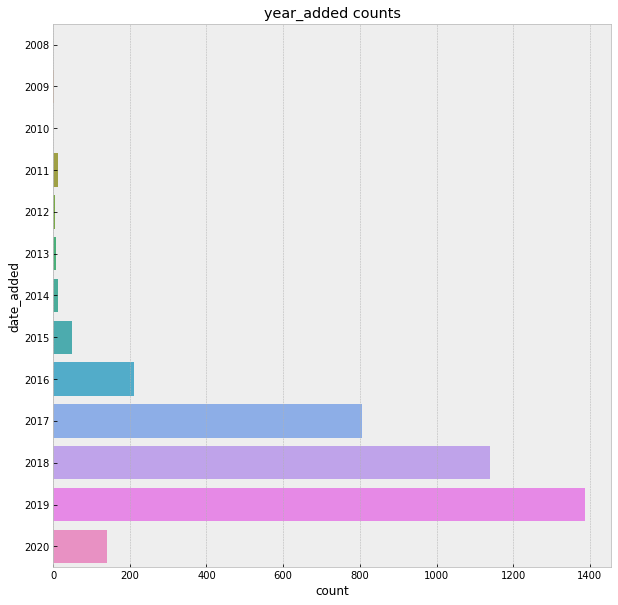

In [41]:
plt.figure(figsize= (10, 10))
plt.title('year_added counts')
sns.countplot(y= years)

There seems to be a trend in year added counts and year released counts. Investigate that in Bivariate Analysis!

Some Questions to answer:
1. When did netflix FIRST start streaming? 2007
2. What did they first release?

About Netflix:
1. Founded in 29 August 1997
2. Started streaming in 2007
3. Paid subscription services

https://en.wikipedia.org/wiki/Timeline_of_Netflix

#### Analysis on Casts and Directors

In [42]:
cast = ', '.join(list(df['cast'])).split(', ')
print('Number of Casts into Duplicates:', len(cast))

Number of Casts into Duplicates: 29389


In [43]:
print('Number of Unique Casts:', len(set(cast)))

Number of Unique Casts: 18834


In [44]:
uni_cast = list(set(cast))

Main casts only, should be expecting more on the main dataset.

In [45]:
director = ', '.join(list(df['director'])).split(', ')
print('Number of Directors into Duplicates:', len(director))

Number of Directors into Duplicates: 4247


In [46]:
print('Number of Unique Director:', len(set(director)))

Number of Unique Director: 3202


In [47]:
uni_director = list(set(director))

Main director only, should be expecting more on the main dataset.

In [48]:
df['director']

6213                               Onur Ünlü
6182                              Jung-ah Im
6167    Vikramaditya Motwane, Anurag Kashyap
6158                           Thomas Astruc
6142                         Andy Devonshire
                        ...                 
9                          Henrik Ruben Genz
7            Rodrigo Toro, Francisco Schultz
6                                Gabe Ibáñez
4                           Fernando Lebrija
0                   Richard Finn, Tim Maltby
Name: director, Length: 3774, dtype: object

In [49]:
list_director = ', '.join(list(df['director'])).split(', ')
list_director

['Onur Ünlü',
 'Jung-ah Im',
 'Vikramaditya Motwane',
 'Anurag Kashyap',
 'Thomas Astruc',
 'Andy Devonshire',
 'Jung-ah Im',
 'Seung-uk Jo',
 'James Hawes',
 'Yasuhiro Irie',
 'Tony Collingwood',
 'Jerry Seinfeld',
 'Tensai Okamura',
 'Stefan Brogren',
 'Iginio Straffi',
 'Gordon Anderson',
 'Ian Barber',
 'Philippa Lowthorpe',
 'Jay Chandrasekhar',
 'James Bamford',
 'Carlos Sedes',
 'Glen Winter',
 'Rob Seidenglanz',
 'Jesse Warn',
 'Rob Seidenglanz',
 'Phil Sgriccia',
 'Everardo Gout',
 'Go Koga',
 'Eli Roth',
 'Michael Cumming',
 'Hayato Date',
 'Danny Cannon',
 'Mario Van Peebles',
 'Ralph Hemecker',
 'Gwyneth Horder-Payton',
 'Milan Cheylov',
 'Dean White',
 'Michael Waxman',
 'Bryan Spicer',
 'Vlad Yudin',
 'Zatella Beatty',
 'G.J. Echternkamp',
 'Sushrut Jain',
 'Gayane Petrosyan',
 'Shivendra Singh Dungarpur',
 'Alexandre Reinecke',
 'Philipp Eichholtz',
 'Jamal Hill',
 'Daniel Gordon',
 'Avinash Arun',
 'Maris Curran',
 'K. Ramanlal',
 'Kike Maíllo',
 'Daniel Burman',
 'Ed G

In [50]:
from collections import Counter
print('Top 10 Most Common Directors')
Counter(list_director).most_common(10)

Top 10 Most Common Directors


[('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Jay Karas', 14),
 ('Jay Chapman', 12),
 ('Marcus Raboy', 12),
 ('Steven Spielberg', 9),
 ('Martin Scorsese', 9),
 ('Johnnie To', 8),
 ('Shannon Hartman', 8),
 ('David Dhawan', 8)]

### Investigate the relationship between duration and type

Hypothesis: All TV Shows have seasons while movies have runtime in minutes

In [51]:
movies = df[df['type'] == 'Movie']
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 5580 to 0
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          3678 non-null   object
 1   title         3678 non-null   object
 2   director      3678 non-null   object
 3   cast          3678 non-null   object
 4   country       3678 non-null   object
 5   date_added    3678 non-null   int64 
 6   release_year  3678 non-null   int64 
 7   rating        3678 non-null   object
 8   duration      3678 non-null   object
 9   listed_in     3678 non-null   object
 10  description   3678 non-null   object
dtypes: int64(2), object(9)
memory usage: 344.8+ KB


In [52]:
movies['duration'].value_counts()

90 min     93
95 min     88
92 min     88
94 min     88
91 min     85
           ..
38 min      1
201 min     1
192 min     1
178 min     1
187 min     1
Name: duration, Length: 174, dtype: int64

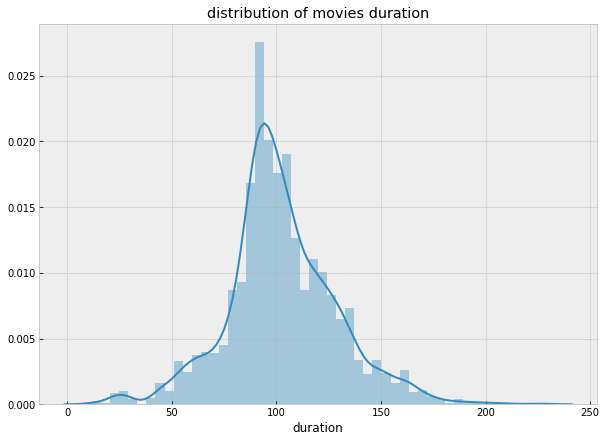

In [53]:
# TO DO: Plot Movies Durations
import re
def tidy(s):
    return int(re.sub(' min', '', s))
m = movies['duration'].apply(tidy)

plt.figure(figsize= (10, 7))
plt.title('distribution of movies duration')
sns.distplot(m, bins= 50)

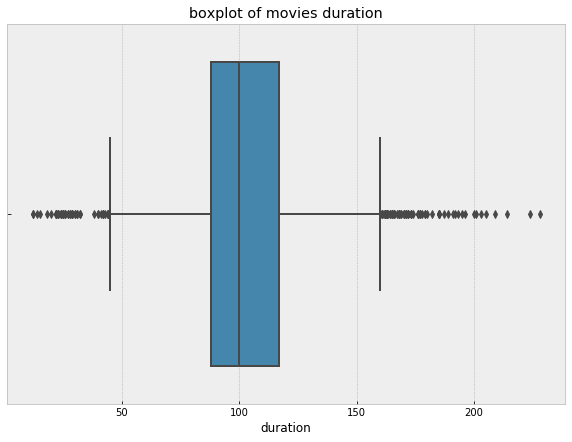

In [54]:
plt.figure(figsize= (10, 7))
plt.title('boxplot of movies duration')
sns.boxplot(m)

In [55]:
q1 = m.quantile(0.25)
median = m.quantile(0.5)
q3 = m.quantile(0.75)
iqr = q3 - q1

print('25th Percentile:', q1)
print('75th Percentile:', q3)
print('Median:', median)
print('Interquantile Range:', iqr)

25th Percentile: 88.0
75th Percentile: 117.0
Median: 100.0
Interquantile Range: 29.0


Median screen time for movies are 100mins or 1h 40mins, from the start to the end.

In [56]:
movies['duration'] = movies['duration'].apply(tidy)

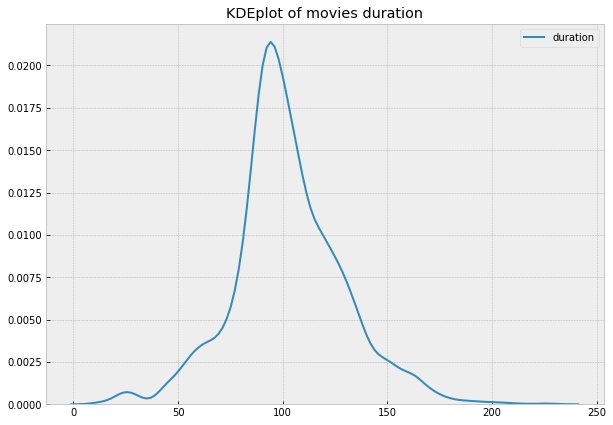

In [57]:
plt.figure(figsize= (10, 7))
plt.title('KDEplot of movies duration')
sns.kdeplot(movies['duration'])

Could there be outliers in this? Time to find out.

In [58]:
lower_bound = q1 - 1.5 * iqr
lower_bound

44.5

In [59]:
list(movies[movies['duration'] < lower_bound]['title'])

['Ram Dass, Going Home',
 'Zion',
 'One Last Shot',
 'LEGO Marvel Super Heroes: Avengers Reassembled!',
 'Kung Fu Panda: Holiday',
 'Across Grace Alley',
 'A StoryBots Christmas',
 "Ricardo O'Farrill: Abrazo navideño",
 'Under an Arctic Sky',
 'Dragons: Dawn of the Dragon Racers',
 'Prince of Peoria: A Christmas Moose Miracle',
 'A Christmas Special: Miraculous: Tales of Ladybug & Cat Noir',
 'Aggretsuko: We Wish You a Metal Christmas',
 'The Last Hangover',
 'Marco Polo: One Hundred Eyes',
 'Bill Hicks: One Night Stand',
 'Tim Allen: Men Are Pigs',
 'Trolls Holiday Special',
 "Mariah Carey's Merriest Christmas",
 'A Family Reunion Christmas',
 'National Parks Adventure',
 'Lego DC Comics: Batman Be-Leaguered',
 'LEGO Marvel Super Heroes: Black Panther',
 'Dear Dracula',
 'Abominable Christmas',
 'Kevin James: Sweat the Small Stuff',
 'Power Rangers: Megaforce: The Robo Knight Before Christmas',
 'LEGO: Marvel Super Heroes: Maximum Overload',
 'Dream Big: Engineering Our World',
 'Room

Is there a way to automate checking?

Scrap IMDB

In [60]:
upper_bound = q3 + 1.5 * iqr
upper_bound

160.5

In [61]:
movies[movies['duration'] > upper_bound]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5510,Movie,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",India,2018,1995,TV-PG,166,"Action & Adventure, International Movies, Musi...",A naïve young man and a rich city girl fall in...
5519,Movie,Dil Hai Tumhaara,Kundan Shah,"Rekha, Preity Zinta, Mahima Chaudhry, Arjun Ra...",India,2018,2002,TV-14,176,"Dramas, International Movies, Music & Musicals",The sophisticated son of a powerful businessma...
5541,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018,1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
5540,Movie,Sairat,Nagraj Manjule,"Rinku Rajguru, Akash Thosar, Arbaz Shaikh, Tan...",India,2018,2016,TV-14,173,"Dramas, International Movies, Romantic Movies",When two college students – a rich man’s daugh...
5534,Movie,Om Shanti Om,Farah Khan,"Shah Rukh Khan, Deepika Padukone, Shreyas Talp...",India,2018,2007,TV-14,169,"Comedies, Dramas, International Movies",Reincarnated 30 years after being killed in a ...
...,...,...,...,...,...,...,...,...,...,...,...
380,Movie,Mujrim,Umesh Mehra,"Mithun Chakraborty, Madhuri Dixit, Suresh Ober...",India,2017,1989,TV-14,163,"Action & Adventure, Dramas, International Movies","Jailed as a teenager, Shankar has been unable ..."
379,Movie,Manoranjan,Shammi Kapoor,"Sanjeev Kumar, Zeenat Aman, Shammi Kapoor, Dev...",India,2017,1974,TV-14,162,"Comedies, International Movies, Music & Musicals","After getting fired, a police officer connects..."
177,Movie,Kabir Singh,Sandeep Reddy Vanga,"Shahid Kapoor, Kiara Advani, Suresh Oberoi, Ar...",India,2019,2019,TV-MA,171,"Dramas, International Movies, Romantic Movies",An exalted but short-fused surgeon plunges int...
142,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun Safaru,...",Nigeria,2019,2018,TV-MA,182,"Dramas, International Movies",When a powerful businesswoman’s political ambi...


Is there a way to automate checking?

Scrap IMDB

##### List Countries (Movies)

There are movies with more than 1 countries label, do some text analysis on the countries!

In [62]:
list_country = ', '.join(list(movies['country'])).split(', ')
list_country

['United States',
 'United States',
 'United States',
 'United States',
 'India',
 'United Kingdom',
 'Russia',
 'India',
 'Brazil',
 'Germany',
 'United States',
 'United Kingdom',
 'India',
 'United States',
 'India',
 'Spain',
 'Argentina',
 'Canada',
 'United States',
 'India',
 'Spain',
 'United States',
 'India',
 'United States',
 'United States',
 'India',
 'Denmark',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United States',
 'Argentina',
 'Brazil',
 'France',
 'Poland',
 'Germany',
 'Denmark',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'United Kingdom',
 'Canada',
 'United States',
 'United Kingdom',
 'Italy',
 'France',
 'United States',
 'Argentina',
 'United States',
 'United Kingdom',
 'Spain',
 'South Korea',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'U

In [63]:
print(len(set(list_country)))

96


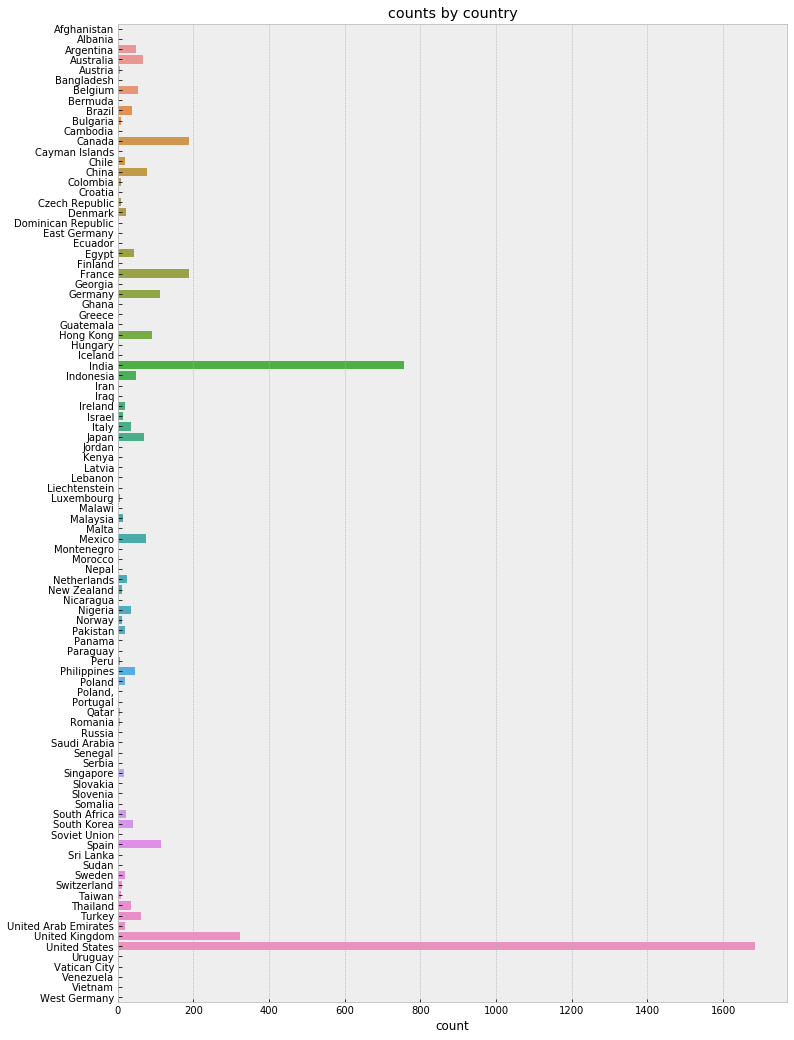

In [64]:
plt.figure(figsize= (12, 18))
plt.title('counts by country')
sns.countplot(y= sorted(list_country))

In [65]:
def singapore(s):
    return 'Singapore' in s
movies[movies['country'].apply(singapore) == True]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5448,Movie,Buffalo Boys,Mike Wiluan,"Yoshua Sudarso, Ario Bayu, Pevita Pearce, Tio ...","Indonesia, Singapore",2019,2018,TV-MA,103,"Action & Adventure, International Movies",Two Indonesian brothers learn the ways of the ...
5439,Movie,A Land Imagined,Yeo Siew Hua,"Peter Yu, Liu Xiaoyi, Guo Yue, Ishtiaque Zico,...","France, Netherlands, Singapore",2019,2019,TV-MA,95,"Dramas, International Movies",A cop in Singapore investigates the disappeara...
5410,Movie,Beyond Skyline,Liam O'Donnell,"Frank Grillo, Bojana Novakovic, Jonny Weston, ...","United Kingdom, China, Canada, Indonesia, Sing...",2018,2017,R,107,"Action & Adventure, Sci-Fi & Fantasy","In the wake of an extraterrestrial invasion, a..."
5249,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore",2019,2010,R,113,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t..."
5131,Movie,Cloud Atlas,"Lilly Wachowski, Lana Wachowski, Tom Tykwer","Tom Hanks, Halle Berry, Jim Broadbent, Hugo We...","Germany, United States, Hong Kong, Singapore",2017,2012,R,172,"Action & Adventure, Cult Movies, Dramas","In this star-studded drama, six seemingly disp..."
4412,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
4416,Movie,Lang Tong,Sam Loh,"William Lawandi, Angeline Yap, Vivienne Tseng,...",Singapore,2018,2015,TV-MA,82,"International Movies, Thrillers","After seducing a philandering con man, a rebel..."
4417,Movie,Miss J Contemplates Her Choice,Jason Lai,"Kit Chan, Xiang Yun, Bobby Tonelli, Shane Pow,...",Singapore,2018,2014,TV-MA,89,"Dramas, International Movies, Thrillers",The life of a radio talk-show host is turned u...
4415,Movie,Imperfect,Steve Cheng,"Edwin Goh, Ian Fang Weijie, Phua Yida, Kimberl...",Singapore,2018,2012,TV-MA,95,"Action & Adventure, International Movies","After a brawl lands him in a Boys’ Home, a tee..."
3485,Movie,Aruna & Her Palate,Edwin,"Dian Sastrowardoyo, Oka Antara, Hannah Al Rash...","Indonesia, South Korea, Singapore",2020,2018,TV-PG,106,"Dramas, International Movies",An epidemiologist turns her nationwide bird fl...


In [66]:
from collections import Counter
Counter(list_country).most_common(3)

[('United States', 1685), ('India', 757), ('United Kingdom', 323)]

Top 3 countries in order: United State (1685), India (757) and United Kingdom (323)

##### List Countries (TV Shows)

In [67]:
tvShows = df[df['type'] == 'TV Show']
tvShows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 6213 to 161
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          96 non-null     object
 1   title         96 non-null     object
 2   director      96 non-null     object
 3   cast          96 non-null     object
 4   country       96 non-null     object
 5   date_added    96 non-null     int64 
 6   release_year  96 non-null     int64 
 7   rating        96 non-null     object
 8   duration      96 non-null     object
 9   listed_in     96 non-null     object
 10  description   96 non-null     object
dtypes: int64(2), object(9)
memory usage: 9.0+ KB


In [68]:
tvShows

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6213,TV Show,Leyla and Mecnun,Onur Ünlü,"Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...",Turkey,2017,2014,TV-PG,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Destiny brings Mecnun and Leyla together as ne...
6182,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,2019,2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...
6167,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States",2019,2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6158,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan",2019,2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6142,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2019,2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...
474,TV Show,"Bring It On, Ghost",Park Joon-hwa,"Taecyeon, Kim So-hyun, Kwon Yul, Kim Sang-ho, ...",South Korea,2019,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A college student with psychic abilities takes...
466,TV Show,Nowhere Man,DJ Chen,"Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-...",Taiwan,2019,2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Two nefarious schemes taking place 10 years ap...
333,TV Show,Age of Rebellion,Peter Ho,"Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou...",Taiwan,2018,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","At their high school, a group of unruly teens ..."
247,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,2017,2016,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Twenty years after 5-year-old Jesse disappears...


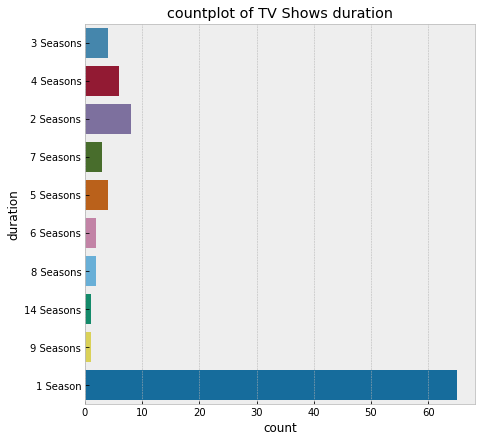

In [69]:
plt.figure(figsize= (7, 7))
plt.title('countplot of TV Shows duration')
sns.countplot(y= tvShows['duration'])

In [70]:
list_country = ', '.join(list(tvShows['country'])).split(', ')
list_country

['Turkey',
 'South Korea',
 'India',
 'United States',
 'France',
 'South Korea',
 'Japan',
 'United Kingdom',
 'South Korea',
 'United Kingdom',
 'Japan',
 'Canada',
 'United Kingdom',
 'United States',
 'United States',
 'Japan',
 'Canada',
 'Italy',
 'United States',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United States',
 'United States',
 'Spain',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Japan',
 'United States',
 'United Kingdom',
 'Japan',
 'United States',
 'United States',
 'Japan',
 'South Korea',
 'United Kingdom',
 'United States',
 'Taiwan',
 'China',
 'India',
 'United Kingdom',
 'South Korea',
 'South Korea',
 'France',
 'Pakistan',
 'Japan',
 'United States',
 'United Kingdom',
 'Ireland',
 'United Kingdom',
 'United States',
 'United States',
 'United States',
 'Italy',
 'Canada',
 'France',
 'Australia',
 'Mexico',
 'United States',
 'United Kingdom',
 'Denmark',
 'United States',


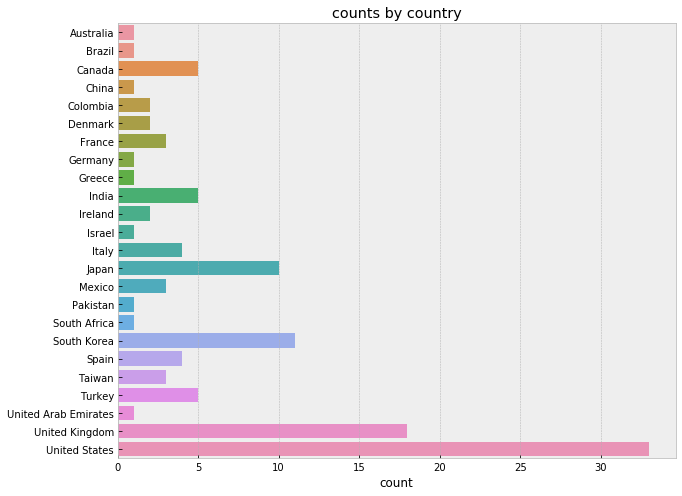

In [71]:
plt.figure(figsize= (10, 8))
plt.title('counts by country')
sns.countplot(y= sorted(list_country))

In [72]:
from collections import Counter
Counter(list_country).most_common(3)

[('United States', 33), ('United Kingdom', 18), ('South Korea', 11)]

Top 3 countries in order: United States (33), United Kingdom (18) and South Korea (11).

### Investigating the correlation between released_year and date_added

To investigate if there is a correlation between the year movies were released and the year movies were added to the netflix (NOT RESTRICTED TO ANY MOVIES).

Hypothesis: There is a correlation because Netflix will want to attract users with the latest movies that were released.

In [73]:
# Year in which movie was added to Netflix
year_added_to_netflix = years

In [74]:
# Year in which movie was released
year_movie_released = df['release_year']

In [75]:
# Year movie was released and year movie was added to Netflix
df_ry_da = df[['release_year', 'date_added']]

In [76]:
df_ry_da

,release_year,date_added
6213,2014,2017
6182,2019,2019
6167,2019,2019
6158,2018,2019
6142,2019,2019
...,...,...
9,2014,2017
7,2017,2017
6,2014,2017
4,2017,2017


In [77]:
df_ry_da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 6213 to 0
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   release_year  3774 non-null   int64
 1   date_added    3774 non-null   int64
dtypes: int64(2)
memory usage: 248.5 KB


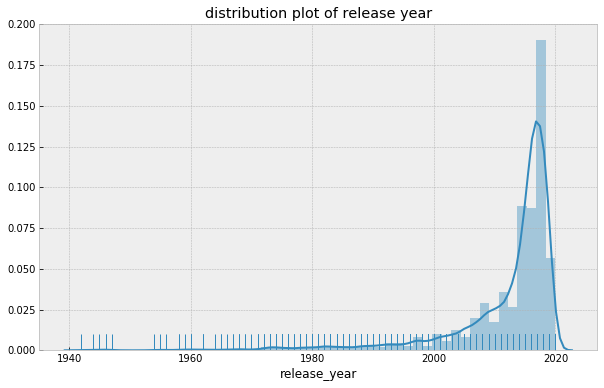

In [78]:
plt.figure(figsize= (10, 6))
plt.title('distribution plot of release year')
sns.distplot(df_ry_da['release_year'], rug= True)

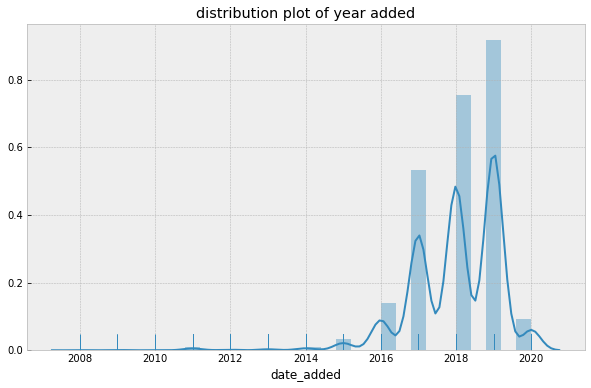

In [79]:
plt.figure(figsize= (10, 6))
plt.title('distribution plot of year added')
sns.distplot(df_ry_da['date_added'], bins= 30, rug= True)

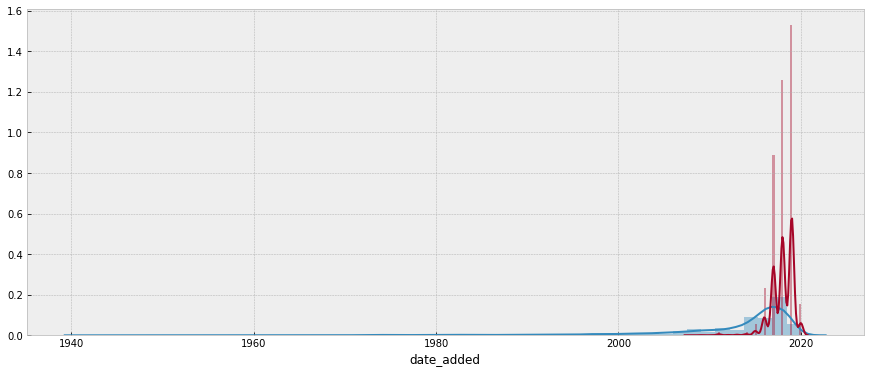

In [80]:
plt.figure(figsize= (15, 6))
sns.distplot(df_ry_da['release_year'], bins= 50)
sns.distplot(df_ry_da['date_added'], bins= 50)

In [81]:
print('Earliest year movie is added to Netflix:', min(list(df_ry_da['date_added'])))

Earliest year movie is added to Netflix: 2008


Is "Movies produced before 2008 are added in 2008?" a sweeping statement?

In [82]:
df_ry_da[df_ry_da['release_year'] < 2008]

,release_year,date_added
5557,1971,2017
5568,1975,2017
5566,2006,2017
5516,1989,2018
5515,1993,2018
...,...,...
231,2005,2018
219,2006,2019
201,1982,2019
108,2000,2011


In [95]:
roi = df_ry_da[df_ry_da['release_year'] < 2008]

One glance... it invalidates the hypothesis haha

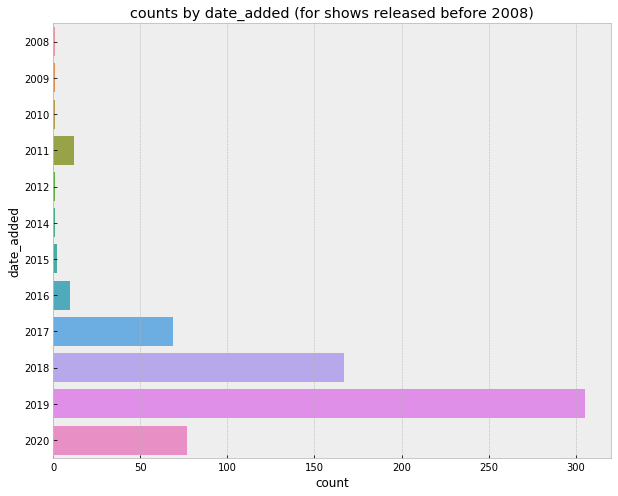

In [98]:
plt.figure(figsize= (10, 8))
plt.title('counts by date_added (for shows released before 2008)')
sns.countplot(y= roi['date_added'])

From the graph above, you can observe that it follows the same general trend as the other movies.

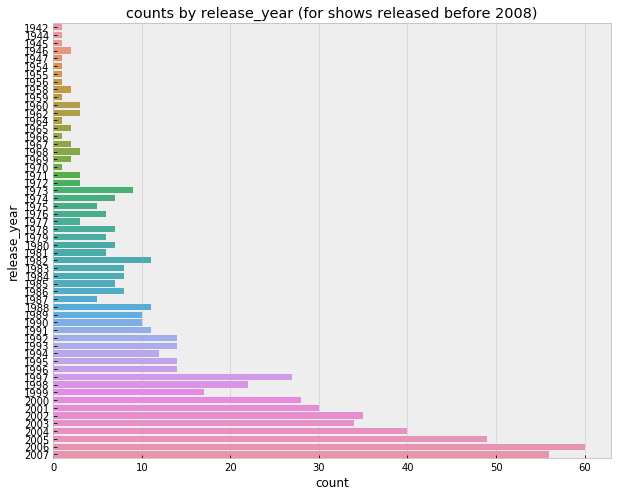

In [102]:
plt.figure(figsize= (10, 8))
plt.title('counts by release_year (for shows released before 2008)')
sns.countplot(y= roi['release_year'])

Conclusion, not all movies released before 2008 was added on 2008. In fact, majority of them were added between 2017 = 2020.

Based on the 2 preceding plots, there seem to be a bit of similarity, let's investigate this using violin plots

KeyboardInterrupt: 

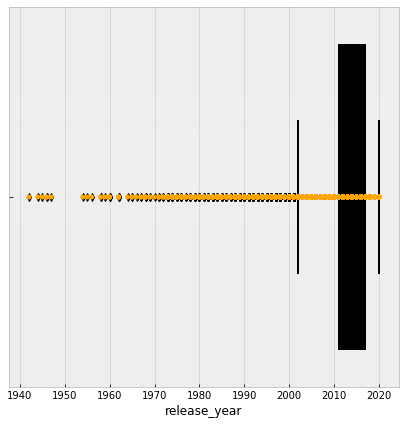

In [103]:
plt.figure(figsize= (7, 7))
sns.boxplot(df_ry_da['release_year'], color= 'black')
sns.swarmplot(df_ry_da['release_year'], color= 'orange')
plt.title('movies release_year')

In [104]:
q1 = df_ry_da['release_year'].quantile(0.25)
median = df_ry_da['release_year'].quantile(0.5)
q3 = df_ry_da['release_year'].quantile(0.75)
iqr = q3 - q1
print('25th Percentile:', q1)
print('75th Percentile:', q3)
print('Median:', median)
print('Interquantile Range:', iqr)

25th Percentile: 2011.0
75th Percentile: 2017.0
Median: 2016.0
Interquantile Range: 6.0


In [105]:
df_ry_da['release_year'].value_counts()

2017    585
2018    537
2016    514
2019    326
2015    324
       ... 
1956      1
1954      1
1945      1
1944      1
1942      1
Name: release_year, Length: 69, dtype: int64

In [106]:
sum(df_ry_da['release_year'].value_counts()[:9]) - 35

2821

The bulk of the movies are released in 2011 and 2018, a total of 255 movies/tv shows released during that period of time.

Text(0.5, 1.0, 'movies added to netflix year')

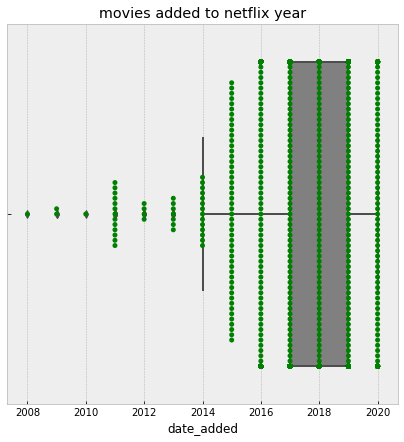

In [107]:
plt.figure(figsize= (7, 7))
sns.boxplot(df_ry_da['date_added'], color= 'grey')
sns.swarmplot(df_ry_da['date_added'], color= 'green')
plt.title('movies added to netflix year')

In [108]:
q1 = df_ry_da['date_added'].quantile(0.25)
median = df_ry_da['date_added'].quantile(0.5)
q3 = df_ry_da['date_added'].quantile(0.75)
iqr = q3 - q1
print('25th Percentile:', q1)
print('75th Percentile:', q3)
print('Median:', median)
print('Interquantile Range:', iqr)

25th Percentile: 2017.0
75th Percentile: 2019.0
Median: 2018.0
Interquantile Range: 2.0


In [109]:
df_ry_da['date_added'].value_counts()

2019    1386
2018    1140
2017     805
2016     211
2020     140
2015      50
2014      14
2011      13
2013       7
2012       4
2009       2
2010       1
2008       1
Name: date_added, dtype: int64

There could be a few reasons for the similarities:
1. Between 2016 and 2019 there are a total of 242 movies/tv shows added to netflix. Likewise, between 2016 and 2019, there a total of 209 new movies released. The difference could be attributed to movies/tv shows that were released before 2016 but added to Netflix in a later time. 
2. "On average, it can be anywhere from 2 - 6 months after the movie leaves theaters." This is to attract new users as well as to retain existing users. Keeping their repository of movies/tv shows updated. Hence the positive correlation. 

In [110]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Recommender System - Content Based
Given:
1. Type -  Movie/TV Shows
2. Cast - Lead actors/actresses
3. Country - Country movies' produced in 
4. Rating - What rating 
5. Listed In - Genre (?)
6. Director - Director/Directors of the Movie/TV Show
7. Description (KIV)

In [111]:
# User Input goes here
user_input = None

In [112]:
recommenderSys_df = df[['type', 'cast', 'country', 'rating', 'listed_in', 'director']]
recommenderSys_df

,type,cast,country,rating,listed_in,director
6213,TV Show,"Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...",Turkey,TV-PG,"International TV Shows, Romantic TV Shows, TV ...",Onur Ünlü
6182,TV Show,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,TV-14,"International TV Shows, Korean TV Shows, Stand...",Jung-ah Im
6167,TV Show,"Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States",TV-MA,"Crime TV Shows, International TV Shows, TV Dramas","Vikramaditya Motwane, Anurag Kashyap"
6158,TV Show,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan",TV-Y7,"Kids' TV, TV Action & Adventure",Thomas Astruc
6142,TV Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,TV-PG,"British TV Shows, Reality TV",Andy Devonshire
...,...,...,...,...,...,...
9,Movie,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",R,"Action & Adventure, Thrillers",Henrik Ruben Genz
7,Movie,Fabrizio Copano,Chile,TV-MA,Stand-Up Comedy,"Rodrigo Toro, Francisco Schultz"
6,Movie,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",R,"International Movies, Sci-Fi & Fantasy, Thrillers",Gabe Ibáñez
4,Movie,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,TV-14,Comedies,Fernando Lebrija


### Text Processing
1. Removing numbers/stopwords (NA)/punctuations/lowercase
2. Stemming/Lemmatization/PoS etc (NA) 

This is a VERY trivial implementation of a recommender system!!! Content based by cosine similarity

In [113]:
col = recommenderSys_df.columns

In [114]:
def lowercase(s):
    return s.lower()
for c in col:
    recommenderSys_df[c] = recommenderSys_df[c].apply(lowercase)

In [115]:
recommenderSys_df.head()

,type,cast,country,rating,listed_in,director
6213,tv show,"ali atay, melis birkan, serkan keskin, ahmet m...",turkey,tv-pg,"international tv shows, romantic tv shows, tv ...",onur ünlü
6182,tv show,"ho-dong kang, soo-geun lee, sang-min lee, youn...",south korea,tv-14,"international tv shows, korean tv shows, stand...",jung-ah im
6167,tv show,"saif ali khan, nawazuddin siddiqui, radhika ap...","india, united states",tv-ma,"crime tv shows, international tv shows, tv dramas","vikramaditya motwane, anurag kashyap"
6158,tv show,"cristina vee, bryce papenbrook, keith silverst...","france, south korea, japan",tv-y7,"kids' tv, tv action & adventure",thomas astruc
6142,tv show,"mel giedroyc, sue perkins, mary berry, paul ho...",united kingdom,tv-pg,"british tv shows, reality tv",andy devonshire


In [116]:
def split(s):
    return s.split(', ')
for c in col:
    recommenderSys_df[c] = recommenderSys_df[c].apply(split)

In [117]:
recommenderSys_df.head()

,type,cast,country,rating,listed_in,director
6213,[tv show],"[ali atay, melis birkan, serkan keskin, ahmet ...",[turkey],[tv-pg],"[international tv shows, romantic tv shows, tv...",[onur ünlü]
6182,[tv show],"[ho-dong kang, soo-geun lee, sang-min lee, you...",[south korea],[tv-14],"[international tv shows, korean tv shows, stan...",[jung-ah im]
6167,[tv show],"[saif ali khan, nawazuddin siddiqui, radhika a...","[india, united states]",[tv-ma],"[crime tv shows, international tv shows, tv dr...","[vikramaditya motwane, anurag kashyap]"
6158,[tv show],"[cristina vee, bryce papenbrook, keith silvers...","[france, south korea, japan]",[tv-y7],"[kids' tv, tv action & adventure]",[thomas astruc]
6142,[tv show],"[mel giedroyc, sue perkins, mary berry, paul h...",[united kingdom],[tv-pg],"[british tv shows, reality tv]",[andy devonshire]


In [118]:
def removews(l):
    return [re.sub('[^0-9a-z]', '', w) for w in l]
for c in col:
    recommenderSys_df[c] = recommenderSys_df[c].apply(removews)

In [119]:
recommenderSys_df.head()

,type,cast,country,rating,listed_in,director
6213,[tvshow],"[aliatay, melisbirkan, serkankeskin, ahmetmmta...",[turkey],[tvpg],"[internationaltvshows, romantictvshows, tvcome...",[onurnl]
6182,[tvshow],"[hodongkang, soogeunlee, sangminlee, youngchul...",[southkorea],[tv14],"[internationaltvshows, koreantvshows, standupc...",[jungahim]
6167,[tvshow],"[saifalikhan, nawazuddinsiddiqui, radhikaapte,...","[india, unitedstates]",[tvma],"[crimetvshows, internationaltvshows, tvdramas]","[vikramadityamotwane, anuragkashyap]"
6158,[tvshow],"[cristinavee, brycepapenbrook, keithsilverstei...","[france, southkorea, japan]",[tvy7],"[kidstv, tvactionadventure]",[thomasastruc]
6142,[tvshow],"[melgiedroyc, sueperkins, maryberry, paulholly...",[unitedkingdom],[tvpg],"[britishtvshows, realitytv]",[andydevonshire]


In [120]:
def join(s):
    return ' '.join(s)
for c in col:
    recommenderSys_df[c] = recommenderSys_df[c].apply(join)

In [121]:
recommenderSys_df.head()

,type,cast,country,rating,listed_in,director
6213,tvshow,aliatay melisbirkan serkankeskin ahmetmmtaztay...,turkey,tvpg,internationaltvshows romantictvshows tvcomedies,onurnl
6182,tvshow,hodongkang soogeunlee sangminlee youngchulkim ...,southkorea,tv14,internationaltvshows koreantvshows standupcome...,jungahim
6167,tvshow,saifalikhan nawazuddinsiddiqui radhikaapte nee...,india unitedstates,tvma,crimetvshows internationaltvshows tvdramas,vikramadityamotwane anuragkashyap
6158,tvshow,cristinavee brycepapenbrook keithsilverstein m...,france southkorea japan,tvy7,kidstv tvactionadventure,thomasastruc
6142,tvshow,melgiedroyc sueperkins maryberry paulhollywood,unitedkingdom,tvpg,britishtvshows realitytv,andydevonshire


In [122]:
recommenderSys_df['corpus'] = recommenderSys_df['type'] + ' ' + recommenderSys_df['cast'] + ' ' + recommenderSys_df['country'] + ' ' + recommenderSys_df['rating'] + ' ' + recommenderSys_df['listed_in'] + ' ' + recommenderSys_df['director']

In [123]:
recommenderSys_df.drop(labels= recommenderSys_df.columns[:-1], axis= 1, inplace= True)

In [124]:
recommenderSys_df

,corpus
6213,tvshow aliatay melisbirkan serkankeskin ahmetm...
6182,tvshow hodongkang soogeunlee sangminlee youngc...
6167,tvshow saifalikhan nawazuddinsiddiqui radhikaa...
6158,tvshow cristinavee brycepapenbrook keithsilver...
6142,tvshow melgiedroyc sueperkins maryberry paulho...
...,...
9,movie jamesfranco katehudson tomwilkinson omar...
7,movie fabriziocopano chile tvma standupcomedy ...
6,movie antoniobanderas dylanmcdermott melaniegr...
4,movie nestacooper katewalsh johnmichaelhiggins...


### NLP and cosine similarity

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [128]:
# SparseDF for corpus
cv = CountVectorizer()
words_sparse_matrix6 = cv.fit_transform(recommenderSys_df['corpus'])
sparse_df = pd.DataFrame(columns= list(cv.get_feature_names()), data= words_sparse_matrix6.A)

In [129]:
sparse_df

,50cent,aabhasyadav,aachalmunjal,aadarshbalakrishna,aadhi,aadishkeluskar,aaditipohankar,aadityapratapsingh,aadukalamnaren,aadyabedi,...,zsazsagabor,zsuzsajaro,zulariffin,zulayhenao,zulvellani,zunekwok,zwelakhemtsaka,zydrunassavickas,zygmunthbner,zygmuntzintel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
cs_df = pd.DataFrame(cosine_similarity(sparse_df, sparse_df))

In [131]:
cs_df

,0,1,2,3,4,5,6,7,8,9,...,3764,3765,3766,3767,3768,3769,3770,3771,3772,3773
0,1.000000,0.133631,0.133631,0.047246,0.158114,0.226134,0.193649,0.096225,0.072169,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055902
1,0.133631,1.000000,0.142857,0.101015,0.084515,0.483494,0.138013,0.154303,0.077152,0.267261,...,0.000000,0.000000,0.069007,0.000000,0.000000,0.000000,0.000000,0.000000,0.064820,0.059761
2,0.133631,0.142857,1.000000,0.050508,0.084515,0.161165,0.138013,0.102869,0.154303,0.178174,...,0.066815,0.000000,0.069007,0.000000,0.064820,0.061314,0.101015,0.062994,0.064820,0.119523
3,0.047246,0.101015,0.050508,1.000000,0.059761,0.113961,0.097590,0.072739,0.109109,0.062994,...,0.000000,0.048795,0.000000,0.042258,0.000000,0.000000,0.000000,0.000000,0.000000,0.042258
4,0.158114,0.084515,0.084515,0.059761,1.000000,0.190693,0.326599,0.060858,0.182574,0.105409,...,0.000000,0.000000,0.000000,0.000000,0.076696,0.072548,0.000000,0.000000,0.000000,0.070711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,0.000000,0.000000,0.061314,0.000000,0.072548,0.000000,0.059235,0.000000,0.132453,0.076472,...,0.172062,0.118470,0.118470,0.051299,0.222566,1.000000,0.086711,0.162221,0.111283,0.102598
3770,0.000000,0.000000,0.101015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.094491,0.097590,0.097590,0.084515,0.091670,0.086711,1.000000,0.089087,0.091670,0.084515
3771,0.000000,0.000000,0.062994,0.000000,0.000000,0.000000,0.000000,0.000000,0.136083,0.078567,...,0.176777,0.121716,0.121716,0.052705,0.171499,0.162221,0.089087,1.000000,0.114332,0.105409
3772,0.000000,0.064820,0.064820,0.000000,0.000000,0.000000,0.000000,0.046676,0.070014,0.161690,...,0.121268,0.125245,0.250490,0.054233,0.117647,0.111283,0.091670,0.114332,1.000000,0.162698


In [132]:
cv.get_feature_names()

['50cent',
 'aabhasyadav',
 'aachalmunjal',
 'aadarshbalakrishna',
 'aadhi',
 'aadishkeluskar',
 'aaditipohankar',
 'aadityapratapsingh',
 'aadukalamnaren',
 'aadyabedi',
 'aageislerov',
 'aakashdabhade',
 'aakashpandey',
 'aaminasheikh',
 'aamirahmed',
 'aamirbashir',
 'aamirkhan',
 'aamirqureshi',
 'aanandkale',
 'aanandrai',
 'aanchalmunjal',
 'aaravkhanna',
 'aarifrahman',
 'aarjavtrivedi',
 'aarohipatel',
 'aaronabrams',
 'aaronblakely',
 'aaronburns',
 'aarondouglas',
 'aarondugger',
 'aaroneckhart',
 'aaroneisenberg',
 'aaronfarb',
 'aaronhann',
 'aaronhimelstein',
 'aaronjeffery',
 'aaronkeogh',
 'aaronkwok',
 'aaronmarshall',
 'aaronmccusker',
 'aaronmerke',
 'aaronmoorhead',
 'aaronmunoz',
 'aaronnee',
 'aaronpaul',
 'aaronpearl',
 'aaronpedersen',
 'aaronstanford',
 'aarontaylorjohnson',
 'aaronwashington',
 'aaronwolff',
 'aaronyoo',
 'aartichhabria',
 'aartimann',
 'aartipatel',
 'aarubala',
 'aarushisharma',
 'aaryadave',
 'aaryanmenon',
 'aashapawar',
 'aashifsheikh',
 '

In [133]:
user = cv.transform(['movie unitedstates fiction danielradchiffe r guillermodeltoro'])
user_sparse_df = pd.DataFrame(user.A, columns= list(cv.get_feature_names()))

In [134]:
user_sparse_df

,50cent,aabhasyadav,aachalmunjal,aadarshbalakrishna,aadhi,aadishkeluskar,aaditipohankar,aadityapratapsingh,aadukalamnaren,aadyabedi,...,zsazsagabor,zsuzsajaro,zulariffin,zulayhenao,zulvellani,zunekwok,zwelakhemtsaka,zydrunassavickas,zygmunthbner,zygmuntzintel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
user_cs = pd.DataFrame(cosine_similarity(sparse_df, user_sparse_df))

In [138]:
user_cs.sort_values(by= 0, ascending= False).head()

,0
3616,0.516398
2971,0.516398
581,0.516398
648,0.516398
3298,0.471405


In [140]:
df.loc[3616]

type                                                        Movie
title                        Indiana Jones and the Temple of Doom
director                                         Steven Spielberg
cast            Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...
country                                             United States
date_added                                                   2019
release_year                                                 1984
rating                                                         PG
duration                                                  119 min
listed_in       Action & Adventure, Children & Family Movies, ...
description     Indiana Jones, his young sidekick and a spoile...
Name: 3616, dtype: object

In [141]:
df.loc[2971]

type                                                        Movie
title                                         The Spectacular Now
director                                           James Ponsoldt
cast            Miles Teller, Shailene Woodley, Brie Larson, J...
country                                             United States
date_added                                                   2018
release_year                                                 2013
rating                                                          R
duration                                                   95 min
listed_in             Dramas, Independent Movies, Romantic Movies
description     Classmates Aimee and Sutter form an unlikely f...
Name: 2971, dtype: object